Вариант №10

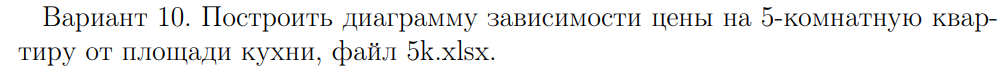

In [82]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
# считываем файл с данными
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/5k.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Дата         218 non-null    object 
 1   Unnamed: 1   0 non-null      float64
 2   К            246 non-null    object 
 3   Город        232 non-null    object 
 4   Район        224 non-null    object 
 5   Unnamed: 5   0 non-null      float64
 6   Улица        232 non-null    object 
 7   Дом          203 non-null    object 
 8   Площадь      232 non-null    object 
 9   Этаж         232 non-null    object 
 10  Цена, т.р.   232 non-null    float64
 11  Цена, м2     232 non-null    float64
 12  Unnamed: 12  232 non-null    object 
dtypes: float64(4), object(9)
memory usage: 107.4+ KB


In [84]:
# первичный анализ данных
data

,Дата,Unnamed: 1,К,Город,Район,Unnamed: 5,Улица,Дом,Площадь,Этаж,"Цена, т.р.","Цена, м2",Unnamed: 12
0,17.02,NaN,5,Новосибирск,Дзж,NaN,Авиастроителей Ип,1,90/70/6,4/9п,3450.0,38.0,Регион-СИБИРЬ
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.02,NaN,5,Новосибирск,Дзж,NaN,Авиастроителей,1,91/67/7,7/10к,3500.0,38.0,"АН ""Абертон"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,24.02,NaN,5,Новосибирск,NaN,NaN,Челюскинцев,3,103/75/7,9/9п,5600.0,54.0,Спектр плюс
1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# выделяем необходимые столбцы, удаляем пустые строки
data_cut = data[['Площадь','Цена, т.р.']]
data_cut = data_cut.dropna(axis=0, how='all')
data_cut.head(5)

,Площадь,"Цена, т.р."
0,90/70/6,3450.0
4,91/67/7,3500.0
8,92/67/7,3500.0
12,90/66/7,3500.0
17,92/67/7,3570.0


In [86]:
# разделяем столбец площадей, результат добавляем в исходную таблицу
data_cut_new = data_cut['Площадь'].str.split('/', expand=True)
data_cut_new.columns = ['Общая площадь', 'Жилая площадь', 'Площадь кухни']
data_cut = pd.concat([data_cut_new, data_cut], axis=1)
data_cut.head(10)

,Общая площадь,Жилая площадь,Площадь кухни,Площадь,"Цена, т.р."
0,90,70,6,90/70/6,3450.0
4,91,67,7,91/67/7,3500.0
8,92,67,7,92/67/7,3500.0
12,90,66,7,90/66/7,3500.0
17,92,67,7,92/67/7,3570.0
21,90,70,7,90/70/7,3600.0
25,90,66,7,90/66/7,3750.0
29,90,0,-,90/0/-,4500.0
33,115,85,30,115/85/30,5200.0
37,89,68,7,89/68/7,3400.0


In [87]:
# оставляем только те строки где присутствует информация о размерах кухни
data_cut = data_cut[data_cut['Площадь кухни'] != '-']
data_cut.head(10)

,Общая площадь,Жилая площадь,Площадь кухни,Площадь,"Цена, т.р."
0,90,70,6,90/70/6,3450.0
4,91,67,7,91/67/7,3500.0
8,92,67,7,92/67/7,3500.0
12,90,66,7,90/66/7,3500.0
17,92,67,7,92/67/7,3570.0
21,90,70,7,90/70/7,3600.0
25,90,66,7,90/66/7,3750.0
33,115,85,30,115/85/30,5200.0
37,89,68,7,89/68/7,3400.0
41,89,67,7,89/67/7,3400.0


<Axes: xlabel='Площадь кухни'>

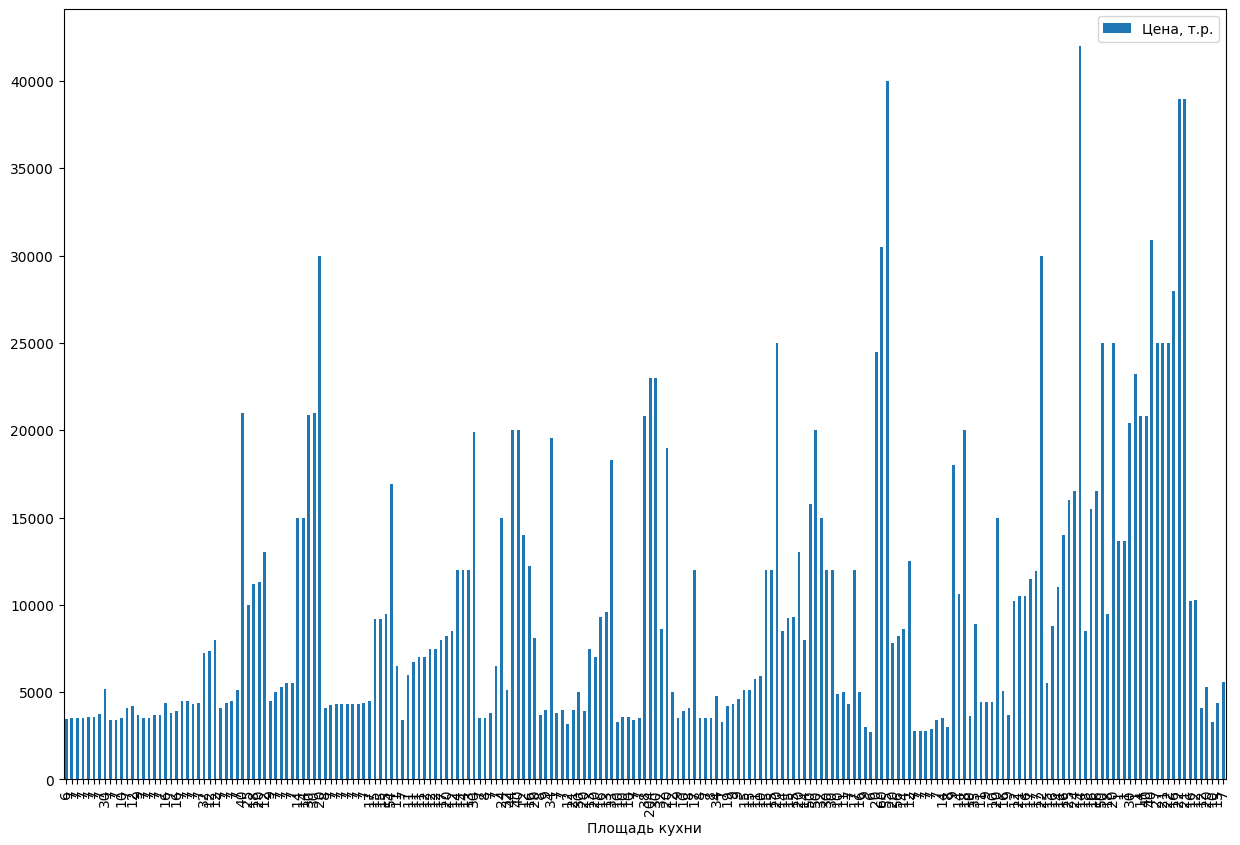

In [88]:
data_cut.plot(kind='bar', x='Площадь кухни', y='Цена, т.р.', figsize=(15, 10))

In [89]:
# для того чтобы сделать диаграмму читаемой, возьмем среднее значение цены по каждому значению квадратуры кухни, отсортировав квадратуру в порядке возрастания

# преобразование площади кухни в тип int64 и сортировка
data_cut['Площадь кухни'] = data_cut['Площадь кухни'].astype('int')
data_cut = data_cut.sort_values(by='Площадь кухни', ascending=True)
data_cut.head(8)

,Общая площадь,Жилая площадь,Площадь кухни,Площадь,"Цена, т.р."
955,310,280,1,310/280/1,23250.0
946,182,160,1,182/160/1,13650.0
941,182,160,1,182/160/1,13650.0
0,90,70,6,90/70/6,3450.0
717,83,68,6,83/68/6,2700.0
294,75,51,7,75/51/7,3380.0
262,91,63,7,91/63/7,4400.0
257,90,70,7,90/70/7,4300.0


In [90]:
# находим средние значения цены, группируя по площади кухни
bar_data = data_cut.groupby('Площадь кухни')['Цена, т.р.'].mean()
bar_data

,"Цена, т.р."
Площадь кухни,
1,16850.000000
6,3075.000000
7,4021.000000
8,3628.428571
9,5374.000000
10,4015.000000
11,5912.857143
12,8156.666667
13,9700.000000


<Axes: xlabel='Площадь кухни'>

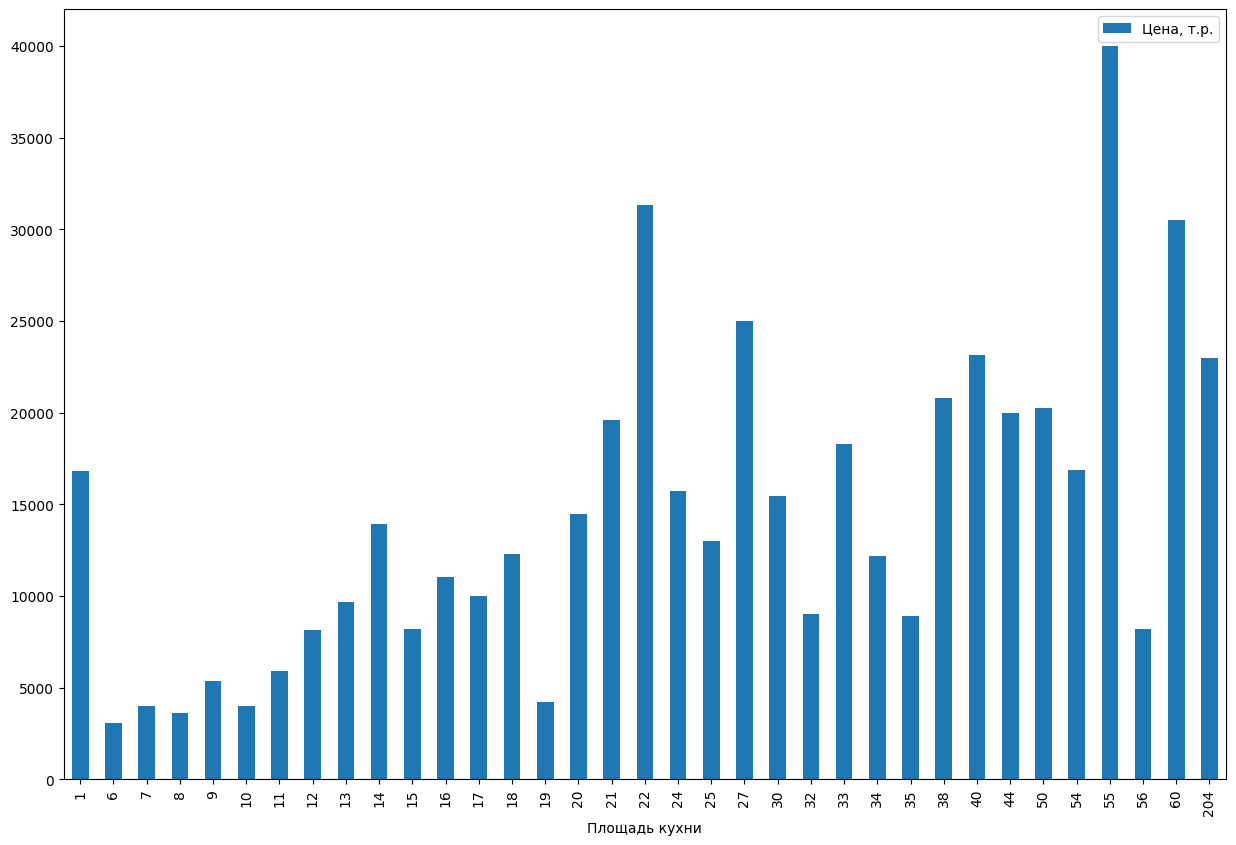

In [91]:
# изображаем конечный вариант диаграммы
bar_data.plot(kind='bar', x='Площадь кухни', y='Цена, т.р.', figsize=(15, 10), legend=True)